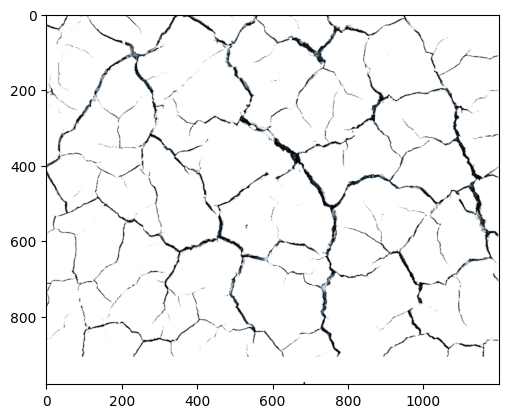

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./src/cracks-overlay1.png", cv2.IMREAD_UNCHANGED)
plt.imshow(img)

In [2]:
print(img.shape)

(980, 1200, 4)


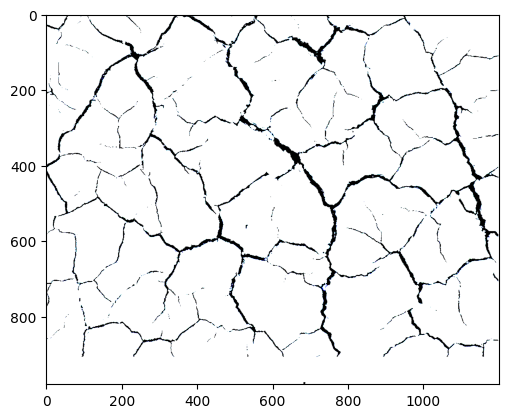

In [3]:
_,thresh = cv2.threshold(img.copy(),127,255,cv2.THRESH_BINARY)

# imagem = cv2.bitwise_not(img.copy())
plt.imshow(thresh)

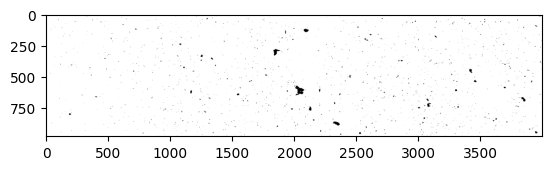

In [4]:
img2 = cv2.imread('./src/dust-overlay1.png', cv2.IMREAD_UNCHANGED)

cropped_image = img2[160:1140, :, :]
cv2.imwrite("cracks-overlay1.png",cropped_image)
plt.imshow(cropped_image)

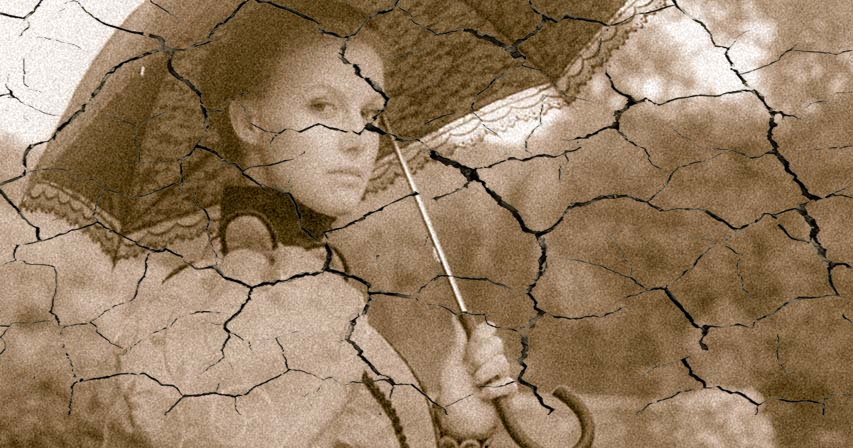

In [5]:
overlay = img.copy()
background = cv2.imread("background.png", cv2.IMREAD_UNCHANGED)
# cv2.imwrite("background.png", background)
# background = cv2.imread("background.png", cv2.IMREAD_UNCHANGED)
# a, b, c = background.shape
# overlay = cv2.resize(overlay, (b, a), interpolation = cv2.INTER_AREA)
# cropped_overlay = background[:a, :b, :]

# assert background.shape == overlay.shape, f"background: {background.shape} \n Overlay: {overlay.shape}"
# added_image = cv2.addWeighted(background,0.1,overlay,0.4,0)

# plt.imshow(added_image)

from PIL import Image
import numpy as np

foreground = Image.open("./src/cracks-overlay1.png").convert("RGBA")
background = Image.open("background.png")

new_foreground = foreground.resize(background.size)


# img = Image.open("/Users/paulvorobyev/test.png").convert("RGBA")
x, y = foreground.size
# card.paste(img, (0, 0, x, y), img)

background.paste(new_foreground, (0, 0), new_foreground)
# print(cv2.cvtColor(np.array(background), cv2.COLOR_RGB2BGR).shape)
background.show()

In [6]:
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

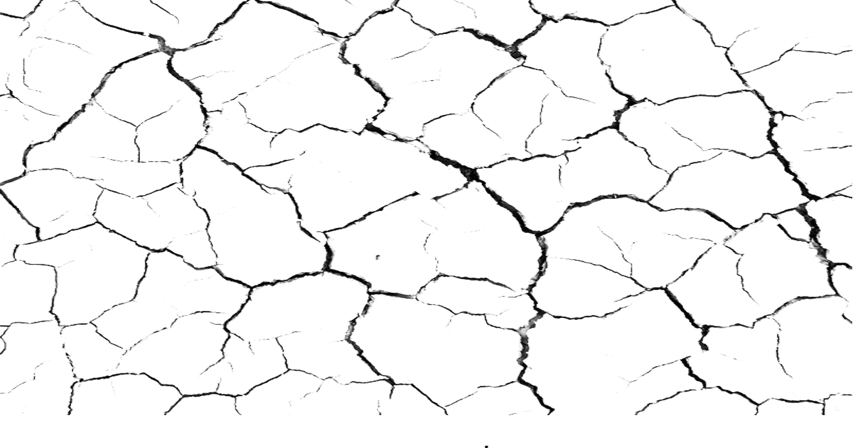

In [7]:
from PIL import Image, ImageOps

new_image = Image.new("RGBA", new_foreground.size, "WHITE") # Create a white rgba background
new_image.paste(new_foreground, (0, 0), new_foreground)
background = cv2.cvtColor(np.array(background), cv2.COLOR_RGB2BGR)
new_image = ImageOps.grayscale(new_image)
# new_image = np.array(new_image)
# dst = cv2.inpaint(background, new_image,3,cv2.INPAINT_TELEA)
new_image.show()
# showInRow(new_image, background, dst)
# plt.imshow(dst)
# plt.imshow(dst)
# print(new_image.shape)
# plt.imshow( new_image)

In [8]:
%ls

README.md       cracks-overlay1.png     masks/
background.jpg  final_model_weights.pt  res18-unet.pt
background.png  main.ipynb              src/


In [9]:
def read_file(filename):
    with open(filename, "rb") as file:
        return file.read()

In [34]:
import os

def split(source, dest_folder, write_size=20000000):
    # Make a destination folder if it doesn't exist yet
    if not os.path.exists(dest_folder):
        os.mkdir(dest_folder)
    else:
        # Otherwise clean out all files in the destination folder
        for file in os.listdir(dest_folder):
            os.remove(os.path.join(dest_folder, file))

    partnum = 0
 
    # Open the source file in binary mode
    input_file = open(source, 'rb')
 
    while True:
        # Read a portion of the input file
        chunk = input_file.read(write_size)
 
        # End the loop if we have hit EOF
        if not chunk:
            break
 
        # Increment partnum
        partnum += 1
 
        # Create a new file name
        filename = os.path.join(dest_folder, f'part00{partnum}0.pickle')
 
        # Create a destination file
        dest_file = open(filename, 'wb')
 
        # Write to this portion of the destination file
        dest_file.write(chunk)
 
        # Explicitly close 
        dest_file.close()
     
    # Explicitly close
    input_file.close()
     
    # Return the number of files created by the split
    return partnum
 
 
def join(source_dir, dest_file, read_size=200000000):
    # Create a new destination file
    output_file = open(dest_file, 'wb')
     
    # Get a list of the file parts
    parts = os.listdir(source_dir)
     
    # Sort them by name (remember that the order num is part of the file name)
    parts.sort()
 
    # Go through each portion one by one
    for file in parts:
         
        # Assemble the full path to the file
        path = os.path.join(source_dir, file)
         
        # Open the part
        input_file = open(path, 'rb')
         
        while True:
            # Read all bytes of the part
            bytes = input_file.read(read_size)
             
            # Break out of loop if we are at end of file
            if not bytes:
                break
                 
            # Write the bytes to the output file
            output_file.write(bytes)
             
        # Close the input file
        input_file.close()
         
    # Close the output file
    output_file.close()

In [37]:
print(split("final_model_weights.pt", "final_shards/"))

7


In [36]:
print(split("res18-unet.pt", "pretrain_shards/"))

7


In [ ]:
obj = join(dest_file="pretrained.pt", source_dir="pretrain_shards/")

In [25]:
import os
dest_folder = "/shards/"
partnum = "1"
foo = os.path.join(dest_folder, f'part00{partnum}0.pickle')
print(foo)

/shards/part0010.pickle
